In [2]:
import pandas as pd
### 폰트 설정
from matplotlib import font_manager
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

# NanumGothic
fe_nanum = fm.FontEntry(
    fname='/Users/icebear/Desktop/workspace/sj-saai-peer/client/src/assets/fonts/NanumGothic.ttf',
    name='NanumGothic')
fm.fontManager.ttflist.insert(0, fe_nanum)

# DejaVu Sans
fe_dejavu = fm.FontEntry(
    fname='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf',
    name='DejaVuSans')
fm.fontManager.ttflist.insert(1, fe_dejavu)

plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic, DejaVuSans'})
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('./data/train.csv')
df

,uid,sz_top,sz_bot,pitch_type,release_pos_x,release_pos_y,release_pos_z,stand,p_throws,inning,...,on_2b,on_1b,release_speed,spin_axis,release_spin_rate,pfx_x,pfx_z,plate_x,plate_z,is_strike
0,0,3.35,1.59,FF,-1.94,53.66,6.53,R,R,1,...,False,False,90.6,192,2192,-0.18,1.68,-0.01,1.97,1
1,1,3.53,1.70,FF,-1.90,53.57,6.39,R,R,1,...,False,False,92.6,196,2209,-0.20,1.67,0.66,2.62,1
2,2,3.67,1.73,FF,-1.87,53.51,6.40,R,R,1,...,False,False,91.6,187,2314,-0.16,1.61,0.55,2.28,1
3,3,3.65,1.72,FF,-1.97,53.65,6.36,R,R,1,...,False,False,93.5,194,2235,-0.36,1.79,-0.83,2.57,1
4,4,3.56,1.72,SL,-1.96,53.74,6.40,R,R,1,...,False,False,89.3,184,2314,0.32,1.25,1.18,1.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291266,311266,3.33,1.55,FF,0.86,54.45,5.55,R,L,7,...,False,False,97.9,146,2292,0.44,1.35,-1.02,2.06,0
291267,311267,3.77,1.86,SL,-1.74,53.68,5.49,L,R,10,...,False,True,88.1,50,2787,0.94,-0.08,-0.61,2.02,1
291268,311268,3.46,1.60,FF,-1.95,53.75,5.87,L,R,10,...,True,False,96.7,217,2379,-0.72,1.44,1.17,2.48,0
291269,311269,3.27,1.51,CH,-2.30,54.66,5.96,L,R,12,...,True,True,86.5,231,1908,-1.34,0.40,-1.25,2.44,0


- 직접적인 영향
1. 스트라이크 존 설정(상하를 평균으로, 좌우는 규칙대로) - sz_top, sz_bot
   1. 심판의 정확도 (정해진 sz에 따른 판정 정확도)
2. release_pos가 미치는 영향
3. pfx가 미치는 영향 
4. plate에서의 위치 영향(자세히)
- 간접적인 영향
1. 주자가 쌓인 것에 대한 영향(on_1b,on_2b,on_3b)
2. 구종에 따른 영향(pitch_type)

## 단계 1. 데이터 분석 & 목적에 맞는 변수 선택

##  1. 스트라이크 존 설정
### 1-1. sz_top, sz_bot 분포

In [3]:
import pandas as pd

sz_top_mean = df['sz_top'].mean()
sz_bot_mean = df['sz_bot'].mean()

sz_top_description = df['sz_top'].describe()
sz_bot_description = df['sz_bot'].describe()

print("sz_top 분포:")
print(sz_top_description)
print(f"sz_top 평균: {sz_top_mean}")

print("\nsz_bot 분포:")
print(sz_bot_description)
print(f"sz_bot 평균: {sz_bot_mean}")

sz_top 분포:
count    291271.000000
mean          3.379379
std           0.200857
min           2.520000
25%           3.250000
50%           3.380000
75%           3.510000
max           4.240000
Name: sz_top, dtype: float64
sz_top 평균: 3.3793786199106672

sz_bot 분포:
count    291271.000000
mean          1.598739
std           0.119384
min           0.770000
25%           1.520000
50%           1.600000
75%           1.680000
max           2.200000
Name: sz_bot, dtype: float64
sz_bot 평균: 1.5987390780407251


findfont: Font family ['DejaVuSans'] not found. Falling back to DejaVu Sans.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


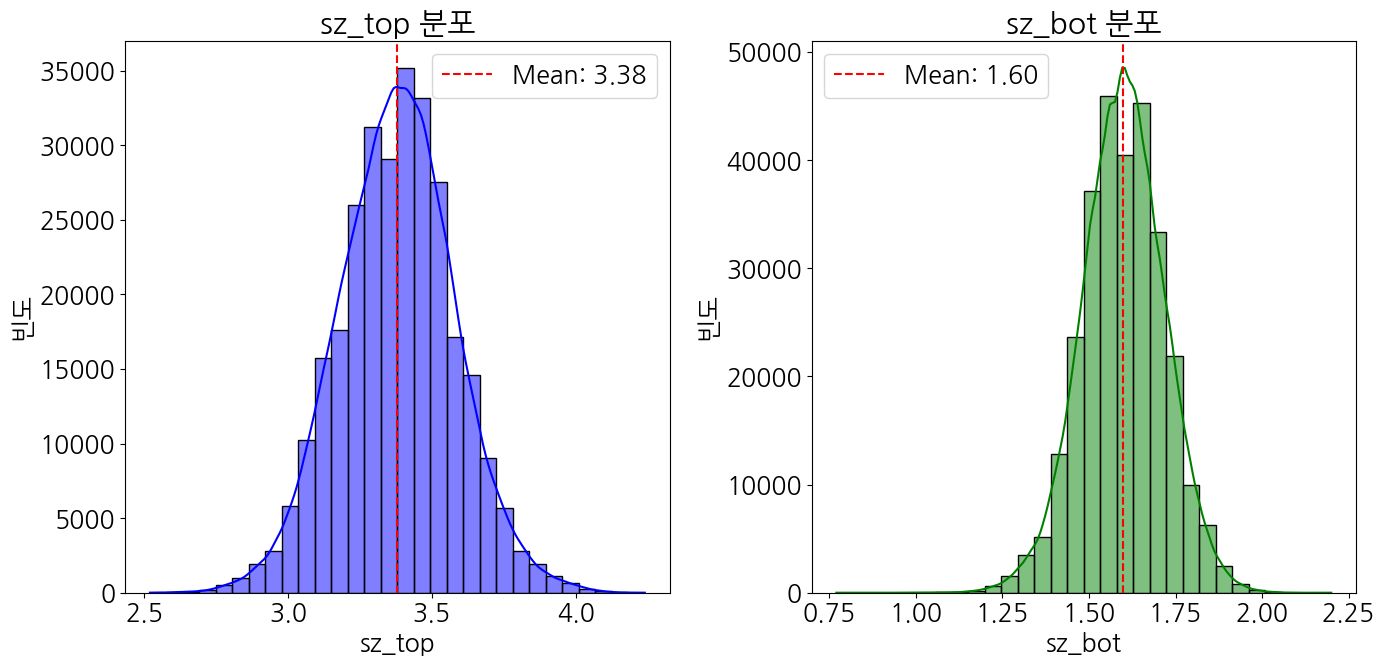

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 7))

# sz_top
plt.subplot(1, 2, 1)
sns.histplot(df['sz_top'], kde=True, color='blue', bins=30)
plt.axvline(sz_top_mean, color='red', linestyle='--', label=f'Mean: {sz_top_mean:.2f}')
plt.title('sz_top 분포')
plt.xlabel('sz_top')
plt.ylabel('빈도')
plt.legend()
# sz_bot
plt.subplot(1, 2, 2)
sns.histplot(df['sz_bot'], kde=True, color='green', bins=30)
plt.axvline(sz_bot_mean, color='red', linestyle='--', label=f'Mean: {sz_bot_mean:.2f}')
plt.title('sz_bot 분포')
plt.xlabel('sz_bot')
plt.ylabel('빈도')
plt.legend()

plt.tight_layout()
plt.show()


-> 스트라이크 존 설정
#### 가로: 총 18.57인치 -> -9.3 <-> 9.3
#### 세로: 3.38 <-> 1.60

** 스트라이크 존을 결정하는게 도움이 되는것인가? test에 sz_top, bot이 들어가니까 중심과의 거리만 파악하면 될듯

-> 그 안에서의 정확도를 파악/ 규격 기준말고 심판들의 기준 & 정확도 확인 해야할 듯

### 1-2. 중심에서의 거리에 따른 판정 분석
-> 중심: (0, 2.49)
#### 1-2-1. 중심에서의 거리 피쳐 생성하기

+ x,y축 나누기..? 합칠 수 있나

In [5]:
df['Distance_from_center_x'] = abs(df['plate_x'] - 0)
df['Distance_from_center_y'] = abs(df['plate_z'] - 2.49)

print(df[['plate_x', 'plate_z', 'Distance_from_center_x', 'Distance_from_center_y']].head())

Distance_from_center_x_description = df['Distance_from_center_x'].describe()
Distance_from_center_y_description = df['Distance_from_center_y'].describe()

print("=====분포 확인=====")
print("Distance_from_center_x 분포:")
print(Distance_from_center_x_description)
print("\nDistance_from_center_y 분포:")
print(Distance_from_center_y_description)

   plate_x  plate_z  Distance_from_center_x  Distance_from_center_y
0    -0.01     1.97                    0.01                    0.52
1     0.66     2.62                    0.66                    0.13
2     0.55     2.28                    0.55                    0.21
3    -0.83     2.57                    0.83                    0.08
4     1.18     1.41                    1.18                    1.08
=====분포 확인=====
Distance_from_center_x 분포:
count    291271.000000
mean          0.828541
std           0.554541
min           0.000000
25%           0.380000
50%           0.760000
75%           1.190000
max           8.660000
Name: Distance_from_center_x, dtype: float64

Distance_from_center_y 분포:
count    291271.000000
mean          0.906381
std           0.646565
min           0.000000
25%           0.390000
50%           0.800000
75%           1.300000
max           7.730000
Name: Distance_from_center_y, dtype: float64


findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


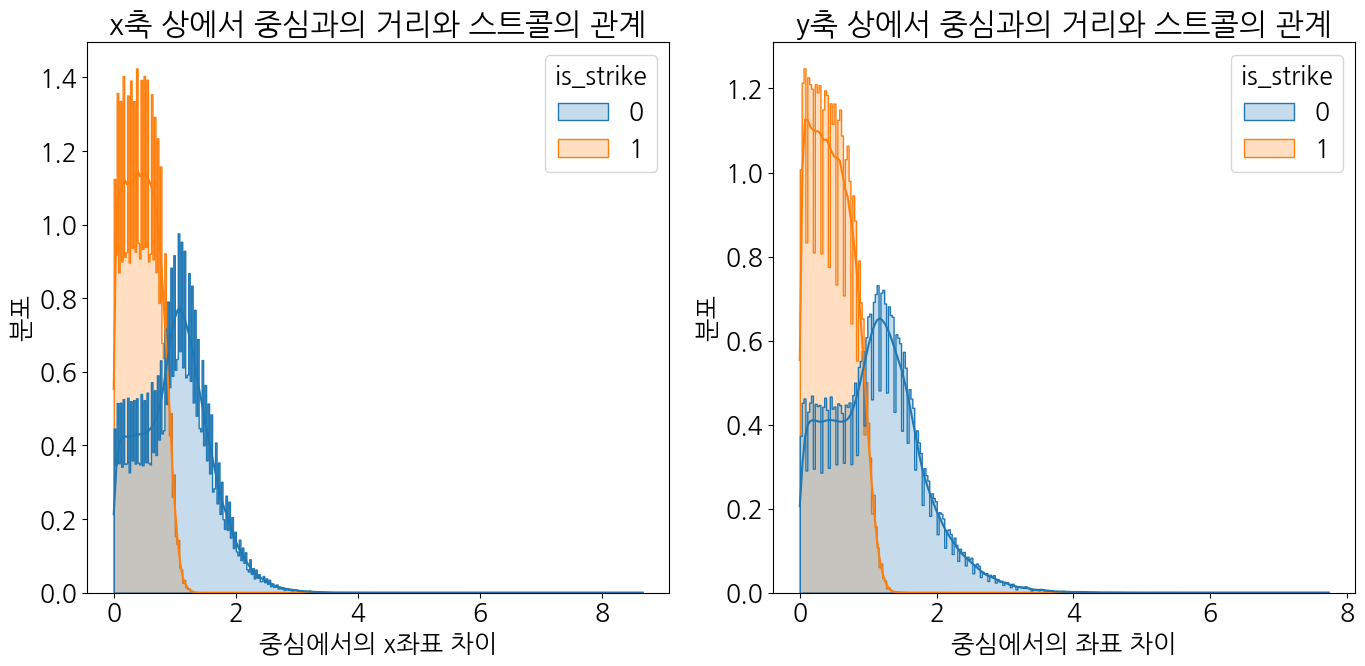

In [6]:
plt.figure(figsize=(14, 7))
# x
plt.subplot(1, 2, 1)
sns.histplot(df, x='Distance_from_center_x', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('x축 상에서 중심과의 거리와 스트콜의 관계')
plt.xlabel('중심에서의 x좌표 차이')
plt.ylabel('분포')

# y
plt.subplot(1, 2, 2)
sns.histplot(df, x='Distance_from_center_y', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('y축 상에서 중심과의 거리와 스트콜의 관계')
plt.xlabel('중심에서의 좌표 차이')
plt.ylabel('분포')

plt.tight_layout()
plt.show()

In [7]:
# 위의 시각화 수치화
import pandas as pd

# x
distance_x_strike_count = df.groupby(['Distance_from_center_x', 'is_strike']).size().unstack(fill_value=0)
print("Distance_from_center_x 값에 따른 스트라이크와 볼의 수:")
print(distance_x_strike_count.head(50))

# y
distance_y_strike_count = df.groupby(['Distance_from_center_y', 'is_strike']).size().unstack(fill_value=0)
print("\nDistance_from_center_y 값에 따른 스트라이크와 볼의 수:")
print(distance_y_strike_count)

Distance_from_center_x 값에 따른 스트라이크와 볼의 수:
is_strike                 0     1
Distance_from_center_x           
0.00                    423   535
0.01                    853  1055
0.02                    840  1064
0.03                    820  1098
0.04                    825  1069
0.05                    835  1137
0.06                    792  1036
0.07                    818  1032
0.08                    840  1047
0.09                    829  1007
0.10                    812  1066
0.11                    804  1044
0.12                    833  1044
0.13                    798  1059
0.14                    826  1066
0.15                    840  1084
0.16                    817  1115
0.17                    838  1115
0.18                    827  1088
0.19                    834  1067
0.20                    802  1091
0.21                    864  1092
0.22                    793  1050
0.23                    890  1080
0.24                    830  1059
0.25                    803  1008
0.26  

-> 다른 시각화 해보기
<br>
-> *** '이 데이터 세트에는 호출된 스트라이크나 볼만 포함됩니다. 이는 스윙 스트라이크(스트라이크 존을 벗어난 투구이지만 타자가 투구에 스윙하여 스트라이크로 간주될 수 있는 투구)와 파울 볼(파울 라인을 넘어 이동하는 접촉 투구로, 때로는 스트라이크로 간주됨)에서 발생하는 모든 노이즈를 제한하기 위한 것입니다.'에 의거하면 거리에 따른 볼, 스트라이크가 명확해야하는데 왜 그렇지 않은건가???

## 2. release_pos 분석 & 미치는 영향

In [8]:
release_pos_x_description = df['release_pos_x'].describe()
release_pos_y_description = df['release_pos_y'].describe()
release_pos_z_description = df['release_pos_z'].describe()

print("release_pos_x 분포:")
print(release_pos_x_description)
print("release_pos_y 분포:")
print(release_pos_y_description)
print("\nrelease_pos_z 분포:")
print(release_pos_z_description)

## 54인치 = 137.16cm

release_pos_x 분포:
count    291271.000000
mean         -0.813205
std           1.839077
min          -4.820000
25%          -2.090000
50%          -1.510000
75%           0.900000
max           4.700000
Name: release_pos_x, dtype: float64
release_pos_y 분포:
count    291271.000000
mean         54.184560
std           0.446865
min          48.370000
25%          53.890000
50%          54.170000
75%          54.480000
max          57.530000
Name: release_pos_y, dtype: float64

release_pos_z 분포:
count    291271.000000
mean          5.800482
std           0.570652
min           0.860000
25%           5.530000
50%           5.850000
75%           6.150000
max           7.660000
Name: release_pos_z, dtype: float64


findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


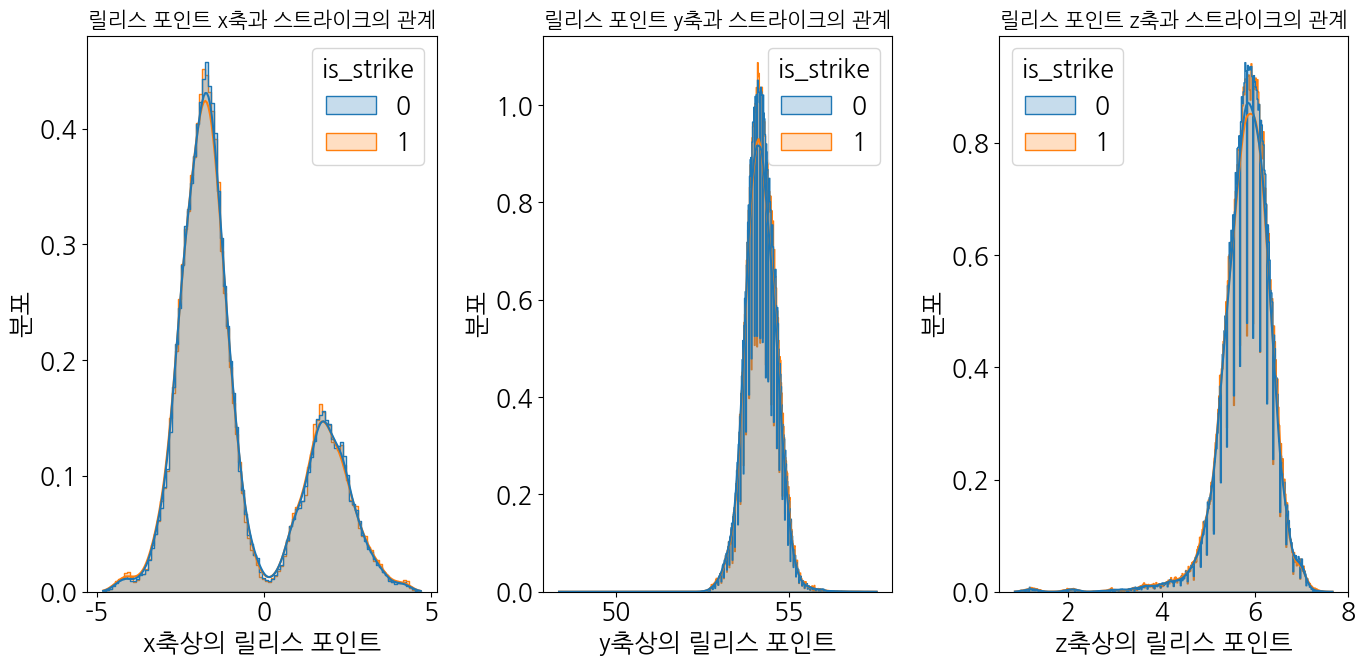

In [9]:
plt.figure(figsize=(14, 7))
# x
plt.subplot(1, 3, 1)
sns.histplot(df, x='release_pos_x', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('릴리스 포인트 x축과 스트라이크의 관계', fontsize = 15)
plt.xlabel('x축상의 릴리스 포인트')
plt.ylabel('분포')

# y
plt.subplot(1, 3, 2)
sns.histplot(df, x='release_pos_y', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('릴리스 포인트 y축과 스트라이크의 관계', fontsize = 15)
plt.xlabel('y축상의 릴리스 포인트')
plt.ylabel('분포')

# z
plt.subplot(1, 3, 3)
sns.histplot(df, x='release_pos_z', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('릴리스 포인트 z축과 스트라이크의 관계', fontsize = 15)
plt.xlabel('z축상의 릴리스 포인트')
plt.ylabel('분포')

plt.tight_layout()
plt.show()

In [10]:
# 위의 시각화 수치화
import pandas as pd

# x
distance_x_strike_count = df.groupby(['release_pos_x', 'is_strike']).size().unstack(fill_value=0)
print("릴리스 포인트 x축과 스트라이크의 관계:")
print(distance_x_strike_count.head(10))

# y
distance_y_strike_count = df.groupby(['release_pos_y', 'is_strike']).size().unstack(fill_value=0)
print("\n릴리스 포인트 y축과 스트라이크의 관계:")
print(distance_y_strike_count.head(10))

# z
distance_y_strike_count = df.groupby(['release_pos_z', 'is_strike']).size().unstack(fill_value=0)
print("\n릴리스 포인트 z축과 스트라이크의 관계:")
print(distance_y_strike_count)


릴리스 포인트 x축과 스트라이크의 관계:
is_strike      0  1
release_pos_x      
-4.82          0  1
-4.81          1  0
-4.80          1  0
-4.77          2  0
-4.76          1  1
-4.75          1  0
-4.74          1  1
-4.73          1  0
-4.72          0  1
-4.71          1  1

릴리스 포인트 y축과 스트라이크의 관계:
is_strike      0  1
release_pos_y      
48.37          0  1
48.79          1  0
51.95          0  1
52.02          1  0
52.08          1  0
52.11          1  0
52.19          0  1
52.21          1  0
52.34          1  0
52.35          1  0

릴리스 포인트 z축과 스트라이크의 관계:
is_strike      0  1
release_pos_z      
0.86           0  1
0.87           1  0
0.88           2  0
0.89           1  0
0.90           1  0
...           .. ..
7.46           2  0
7.51           0  1
7.52           1  0
7.53           1  0
7.66           1  0

[626 rows x 2 columns]


### -> 릴리스 포인트와 스트라이크 판정은 관계가 없다

## 3. pfx 분석 & 미치는 영향 

In [11]:
pfx_x_description = df['pfx_x'].describe()
pfx_z_description = df['pfx_z'].describe()

print("pfx_x 분포:")
print(pfx_x_description)
print("\npfx_z 분포:")
print(pfx_z_description)


pfx_x 분포:
count    291271.000000
mean         -0.109728
std           0.891675
min          -2.380000
25%          -0.870000
50%          -0.180000
75%           0.610000
max           2.570000
Name: pfx_x, dtype: float64

pfx_z 분포:
count    291271.000000
mean          0.630969
std           0.752684
min          -2.000000
25%           0.170000
50%           0.720000
75%           1.260000
max           2.800000
Name: pfx_z, dtype: float64


findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


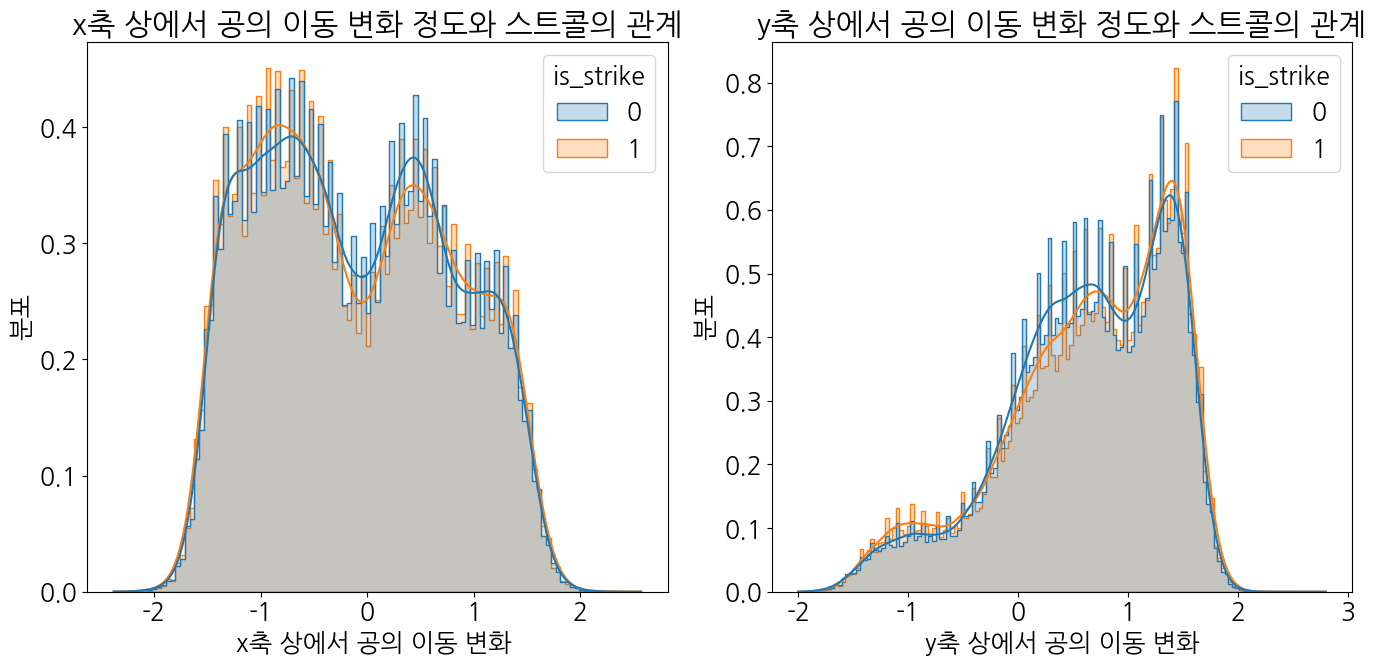

In [12]:
plt.figure(figsize=(14, 7))
# x
plt.subplot(1, 2, 1)
sns.histplot(df, x='pfx_x', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('x축 상에서 공의 이동 변화 정도와 스트콜의 관계')
plt.xlabel('x축 상에서 공의 이동 변화 ')
plt.ylabel('분포')

# y
plt.subplot(1, 2, 2)
sns.histplot(df, x='pfx_z', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('y축 상에서 공의 이동 변화 정도와 스트콜의 관계')
plt.xlabel('y축 상에서 공의 이동 변화')
plt.ylabel('분포')

plt.tight_layout()
plt.show()

#### -> 변화가 클수록 스트라이크 판정 확률이 높은듯, 다른 시각화 필요

## 4. plate 분석 & 위치 영향 관계

In [13]:
plate_x_description = df['plate_x'].describe()
plate_z_description = df['plate_z'].describe()

print("plate_x 분포:")
print(plate_x_description)
print("\nplate_z 분포:")
print(plate_z_description)

plate_x 분포:
count    291271.000000
mean          0.059891
std           0.995193
min          -8.660000
25%          -0.700000
50%           0.080000
75%           0.820000
max           4.610000
Name: plate_x, dtype: float64

plate_z 분포:
count    291271.000000
mean          2.313389
std           1.099265
min          -3.830000
25%           1.530000
50%           2.250000
75%           3.070000
max          10.220000
Name: plate_z, dtype: float64


findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


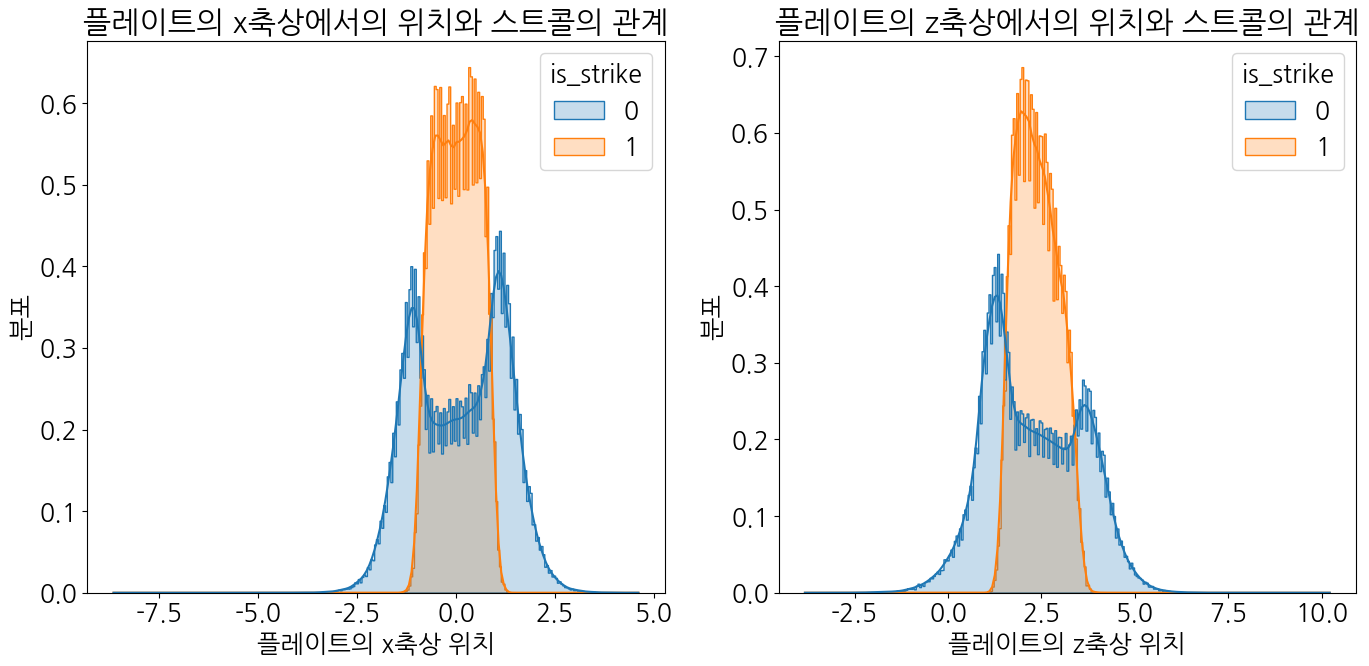

In [14]:
plt.figure(figsize=(14, 7))
# x
plt.subplot(1, 2, 1)
sns.histplot(df, x='plate_x', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('플레이트의 x축상에서의 위치와 스트콜의 관계')
plt.xlabel('플레이트의 x축상 위치')
plt.ylabel('분포')

# y
plt.subplot(1, 2, 2)
sns.histplot(df, x='plate_z', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('플레이트의 z축상에서의 위치와 스트콜의 관계')
plt.xlabel('플레이트의 z축상 위치')
plt.ylabel('분포')

plt.tight_layout()
plt.show()

### 4-1. 스트존 경계에서의 스트콜

findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


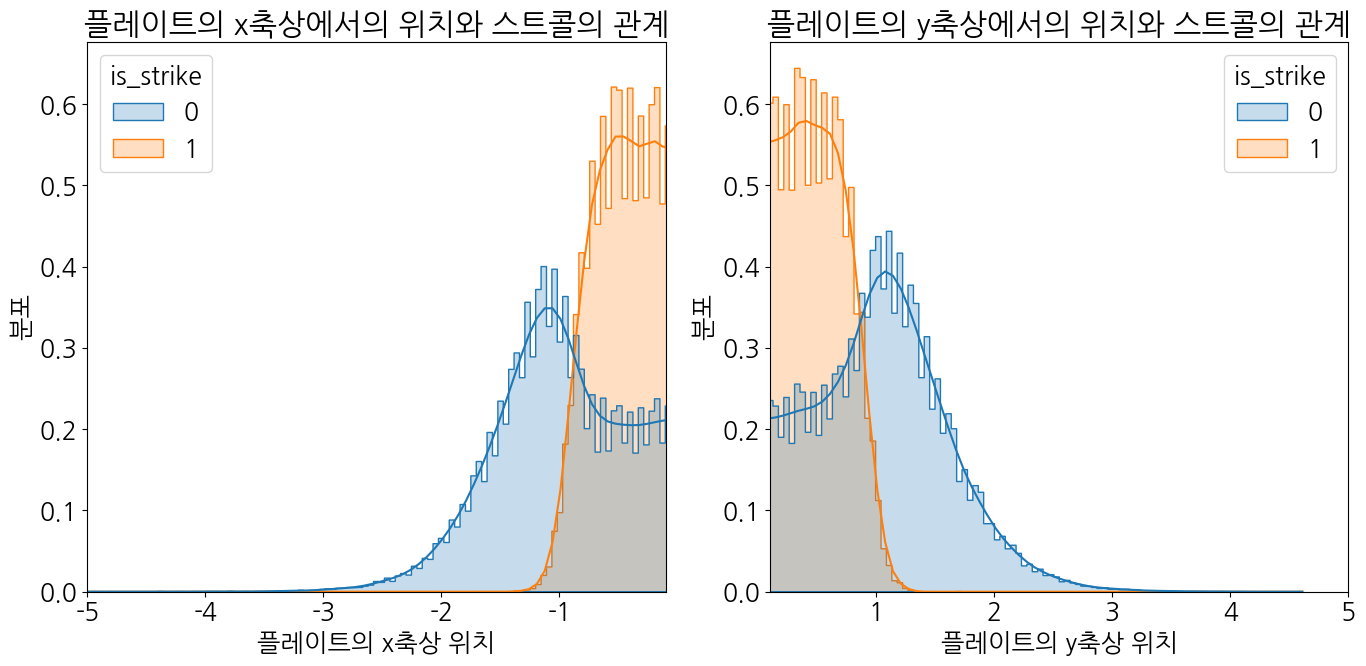

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))

#### 가로: 총 18.57인치 -> -9.3 <-> 9.3
#### 세로: 3.38 <-> 1.60

x_min_left, x_max_left = -5.0, -0.1
x_min_right, x_max_right = 0.1, 5.0

# plate_x 분포 시각화
plt.subplot(1, 2, 1)
sns.histplot(df, x='plate_x', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('플레이트의 x축상에서의 위치와 스트콜의 관계')
plt.xlabel('플레이트의 x축상 위치')
plt.ylabel('분포')
plt.xlim(x_min_left, x_max_left)

# plate_z 분포 시각화
plt.subplot(1, 2, 2)
sns.histplot(df, x='plate_x', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('플레이트의 y축상에서의 위치와 스트콜의 관계')
plt.xlabel('플레이트의 y축상 위치')
plt.ylabel('분포')
plt.xlim(x_min_right, x_max_right)
plt.tight_layout()
plt.show()


findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.
findfont: Font family 'DejaVuSans' not found.


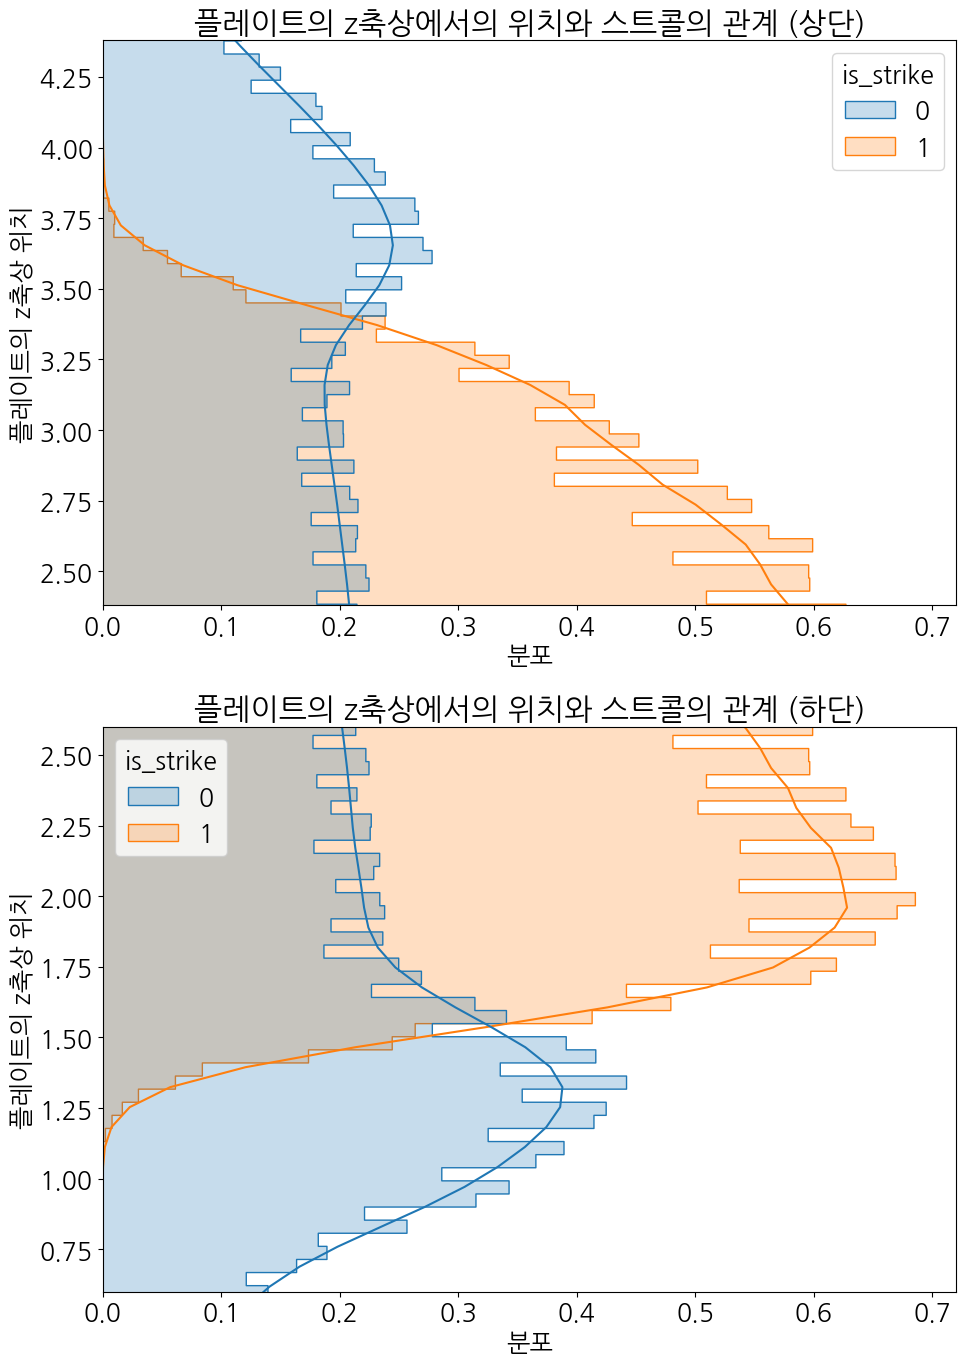

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 14))  # 가로, 세로 크기 조정

#### 가로: 총 18.57인치 -> -9.3 <-> 9.3
#### 세로: 3.38 <-> 1.60

y_min_top, y_max_top = 2.38, 4.38
y_min_bot, y_max_bot = 0.6, 2.6

# plate_z 분포 시각화 (위쪽 그래프)
plt.subplot(2, 1, 1)
sns.histplot(df, y='plate_z', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('플레이트의 z축상에서의 위치와 스트콜의 관계 (상단)')
plt.ylabel('플레이트의 z축상 위치')
plt.xlabel('분포')
plt.ylim(y_min_top, y_max_top)

# plate_z 분포 시각화 (아래쪽 그래프)
plt.subplot(2, 1, 2)
sns.histplot(df, y='plate_z', hue='is_strike', element='step', stat='density', common_norm=False, kde=True)
plt.title('플레이트의 z축상에서의 위치와 스트콜의 관계 (하단)')
plt.ylabel('플레이트의 z축상 위치')
plt.xlabel('분포')
plt.ylim(y_min_bot, y_max_bot)

plt.tight_layout()
plt.show()
